In [2]:
"""
Native python datas anf times
"""
# datetime 날짜 정의
from datetime import datetime
t = datetime(year = 2021, month = 10, day = 27)
print(t)
print(type(t))

2021-10-27 00:00:00
<class 'datetime.datetime'>


In [3]:
#문자열 파싱을 통한 날짜 해석
#string parser
from dateutil import parser
date = parser.parse("27th of October, 2021")
print(date)

2021-10-27 00:00:00


In [4]:
#datetime 요일 출력 
date.strftime('%A')

'Wednesday'

In [5]:
"""
types arrays of times: numpy's datetime64
"""
#create datetime64 using array()
import numpy as np
date = np.array('2021-10-27', dtype = np.datetime64)
print (date)

date = np.datetime64('2021-10-28')
print(date)

2021-10-27
2021-10-28


In [6]:
date + np.arange(8)   # 벡터화 연산을 통한 시간 배열 생성 

array(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
       '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04'],
      dtype='datetime64[D]')

In [7]:
#minite-based datetime
t= np.datetime64('2021-10-27 09:48')
print(t)

2021-10-27T09:48


In [8]:
#nanosecond-based datetime
t= np.datetime64('2021-10-27 09:48:10.29','ns')
print(t)

2021-10-27T09:48:10.290000000


In [24]:
#dates anf times in pandas
import pandas as pd 
date = pd.to_datetime("27th of October, 2021")

date.strftime('%A')

date + pd.to_timedelta(np.arange(7))

DatetimeIndex([          '2021-10-27 00:00:00',
               '2021-10-27 00:00:00.000000001',
               '2021-10-27 00:00:00.000000002',
               '2021-10-27 00:00:00.000000003',
               '2021-10-27 00:00:00.000000004',
               '2021-10-27 00:00:00.000000005',
               '2021-10-27 00:00:00.000000006'],
              dtype='datetime64[ns]', freq=None)

In [25]:
"""
Indexing by time 
"""
#타임스탬프를 인덱스로 사용 
ind = pd.DatetimeIndex(['2021-10-27','2021-10-28','2021-10-29','2021-10-30','2021-10-31','2021-11-01','2021-11-02'])
print(ind)

ser = pd.Series([0,1,2,3,4,5,6], index = ind)
print(ser)

ser['2021-11']



DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02'],
              dtype='datetime64[ns]', freq=None)
2021-10-27    0
2021-10-28    1
2021-10-29    2
2021-10-30    3
2021-10-31    4
2021-11-01    5
2021-11-02    6
dtype: int64


2021-11-01    5
2021-11-02    6
dtype: int64

In [26]:
"""
time series data structures
"""
#thimestamp and datetimeindex
dates = pd.to_datetime([datetime(2015,7,3),"4th of July, 2015",'2015-Jul-6','07-07-2015','20150708'])
print(dates)

#periodindex
dates.to_period('D')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [27]:
dates.to_period('W')

PeriodIndex(['2015-06-29/2015-07-05', '2015-06-29/2015-07-05',
             '2015-07-06/2015-07-12', '2015-07-06/2015-07-12',
             '2015-07-06/2015-07-12'],
            dtype='period[W-SUN]', freq='W-SUN')

In [28]:
#timedeltaindex, 시간차 
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [29]:
"""
regular sequences
"""
#pd.date_range()
#시작/종료 타임스탬프를 이용한 시퀀스 생성
pd.date_range('2021-10-27','2021-10-31')


DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31'],
              dtype='datetime64[ns]', freq='D')

In [30]:
#빈도설정 
pd.date_range('2021-10-27', periods =12, freq= 'H')


DatetimeIndex(['2021-10-27 00:00:00', '2021-10-27 01:00:00',
               '2021-10-27 02:00:00', '2021-10-27 03:00:00',
               '2021-10-27 04:00:00', '2021-10-27 05:00:00',
               '2021-10-27 06:00:00', '2021-10-27 07:00:00',
               '2021-10-27 08:00:00', '2021-10-27 09:00:00',
               '2021-10-27 10:00:00', '2021-10-27 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [31]:
#시작 타임스탬프, 기간 길이를 이용 
pd.date_range('2021-10-27', periods = 5)


DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31'],
              dtype='datetime64[ns]', freq='D')

In [32]:
# 월말
pd.date_range('2021-11-1', periods =10, freq= 'M')

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31'],
              dtype='datetime64[ns]', freq='M')

In [33]:
# 영업일 기준 월말 - 영업일에는 주말을 제외한다. 
pd.date_range('2021-11-01', periods =10, freq= 'BM')


DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31'],
              dtype='datetime64[ns]', freq='BM')

In [34]:
#접미사 's' 추가하면, 종료시점에서 시작시점이 됨! ex) MS 는 월초가 된다. 
pd.date_range('2021-11-01', periods =10, freq= 'MS')

DatetimeIndex(['2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [35]:
pd.date_range('2021-11-01', periods =9, freq= '2H30T')

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 02:30:00',
               '2021-11-01 05:00:00', '2021-11-01 07:30:00',
               '2021-11-01 10:00:00', '2021-11-01 12:30:00',
               '2021-11-01 15:00:00', '2021-11-01 17:30:00',
               '2021-11-01 20:00:00'],
              dtype='datetime64[ns]', freq='150T')

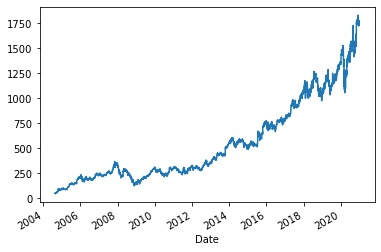

In [46]:
from pandas_datareader import data

goog = data.DataReader('goog',start = '2004', end = '2021', data_source = 'yahoo')
goog = goog['Close']
goog.plot();

In [47]:
#visualization setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%config InlineBackend.figure_format = 'svg'

In [48]:
"""
resampling
"""
goog.resample('Q').mean()

Date
2004-09-30      55.211886
2004-12-31      85.182200
2005-03-31      94.299493
2005-06-30     120.979508
2005-09-30     147.513490
                 ...     
2019-12-31    1290.565161
2020-03-31    1356.975803
2020-06-30    1349.559919
2020-09-30    1525.829367
2020-12-31    1687.301720
Freq: Q-DEC, Name: Close, Length: 66, dtype: float64

In [53]:
goog.resample('2Y').max()


Date
2004-12-31      98.431053
2006-12-31     253.873413
2008-12-31     369.509979
2010-12-31     312.214752
2012-12-31     382.590942
2014-12-31     607.806763
2016-12-31     813.109985
2018-12-31    1268.329956
2020-12-31    1827.989990
Freq: 2A-DEC, Name: Close, dtype: float64

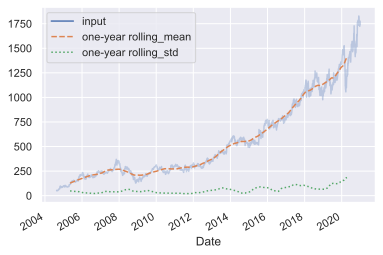

In [57]:
"""
rolling windows
"""
rolling = goog.rolling(365, center = True)
data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style = ['-','--',':'])
ax.lines[0].set_alpha(0.3)
